In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y_test {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to
255.
# y_train: digit labels (integers in range 0-9)
# Shape of X_train (60000, 28, 28)
# Shape of y_train (60000,)
# Shape of x_test (10000, 28, 28)
# Shape of y_test (10000,)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


255.0

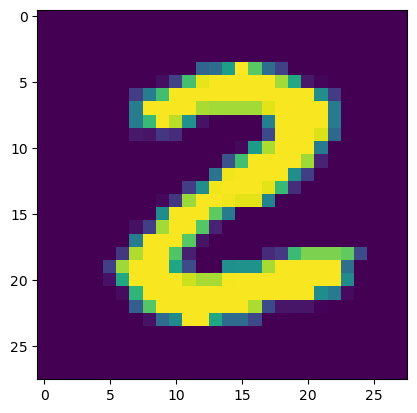

2


In [5]:
#displaying the image
plt.imshow(x_train[25])
plt.show()
#printing corresponding label
print(y_train[25])

In [6]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value
print(x_train.shape, x_test.shape)


(60000, 28, 28) (10000, 28, 28)


In [8]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(50,activation='relu',name='L1'),
 keras.layers.Dense(50,activation='relu',name='L2'),
 keras.layers.Dense(10,activation='softmax',name='L3')
])
model.compile(optimizer="sgd", loss=tf.keras.losses.SparseCategoricalCrossentropy(),
 metrics=['accuracy'])

c:\Users\Harshvardhan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(x_train, y_train,
 batch_size=30,
 epochs=10,
 validation_data=(x_test, y_test),
 shuffle=True)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8007 - loss: 0.7311 - val_accuracy: 0.9072 - val_loss: 0.3259
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9110 - loss: 0.3072 - val_accuracy: 0.9259 - val_loss: 0.2630
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9258 - loss: 0.2579 - val_accuracy: 0.9331 - val_loss: 0.2295
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9342 - loss: 0.2263 - val_accuracy: 0.9390 - val_loss: 0.2079
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9417 - loss: 0.2025 - val_accuracy: 0.9441 - val_loss: 0.1882
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9473 - loss: 0.1826 - val_accuracy: 0.9471 - val_loss: 0.1785
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9515 - loss: 0.1670 - val_accuracy: 0.9511 - val_loss: 0.1628
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9547 - loss: 0.1541 - 

<Axes: >

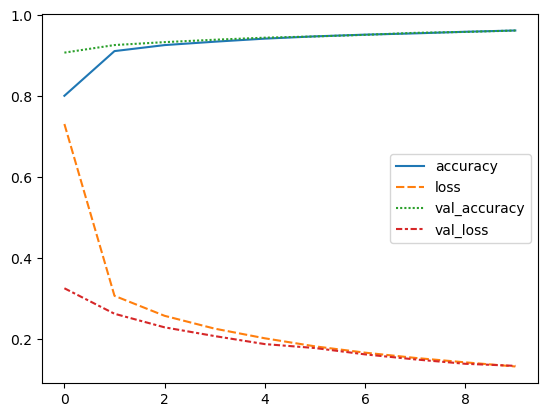

In [10]:
import seaborn as sns
sns.lineplot(model.history.history)

In [11]:
loss,accuracy = model.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9617 - loss: 0.1345


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


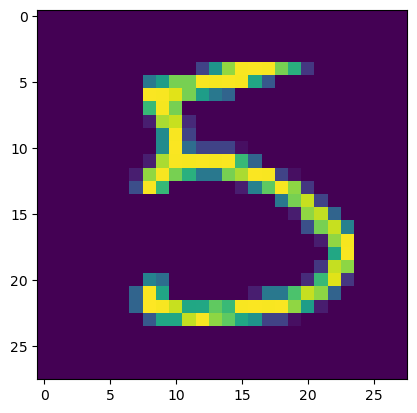

5


In [12]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))
